In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [5]:
data=pd.read_csv("D:\\3YR\\TEKWORKS\\Jan-7\\CarPrice_Assignment.csv")

In [6]:
car=pd.DataFrame(data)

In [7]:
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
car.shape

(205, 26)

In [10]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [11]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

Tasks

1. Load the dataset and identify the relevant columns.
2. Use:Engine size as the input feature
Car price as the output variable
3. Visualize the relationship between engine size and price.
4. Build a predictive model to estimate car price based on engine size.
5. Predict the price for a car with: Engine size = 200
6. Increase the flexibility of your model and observe how the curve changes.
7. Compare predictions from: a simple straight-line model, a curved model
8. Analyze which model:captures the trend better,aives more realistic predictions


In [12]:
car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [13]:
car[['enginesize','price']].head()

,enginesize,price
0,130,13495.0
1,130,16500.0
2,152,16500.0
3,109,13950.0
4,136,17450.0


In [14]:
x = car[['enginesize']]
y = car['price']

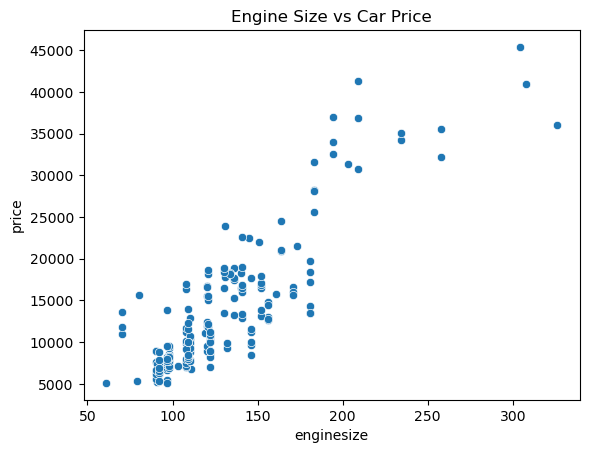

In [15]:
sns.scatterplot(x='enginesize', y='price', data=car)
plt.title("Engine Size vs Car Price")
plt.show()

In [16]:
lr = LinearRegression()
lr.fit(x, y)

LinearRegression()

In [17]:

a = pd.DataFrame({'enginesize': [200]})
lp = lr.predict(a)
lp

array([25534.23774749])

In [28]:
p = PolynomialFeatures(degree=4, include_bias=False)
p1 = p.fit_transform(x)

pr = LinearRegression()
pr.fit(p1, y)

LinearRegression()

In [29]:

pp = pr.predict(p.transform(a))
pp

array([28205.13186529])

C:\Users\dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\dell\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


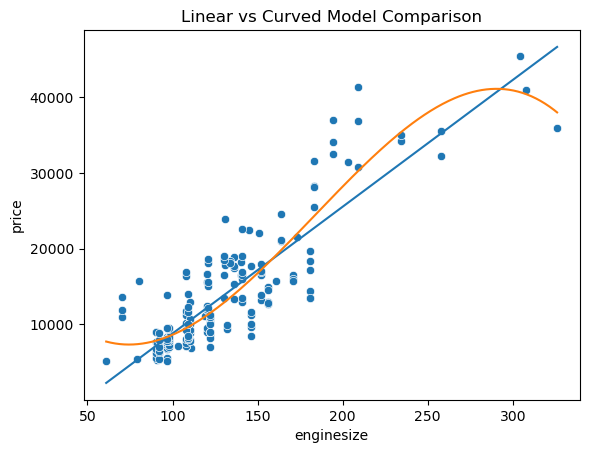

In [30]:
X1 = np.linspace(x.min(), x.max(), 300).reshape(-1, 1)

car1 = pd.DataFrame({
    'enginesize': X1.flatten(),
    'Linear Model': lr.predict(X1),
    'pnomial Model': pr.predict(p.transform(X1))
})

sns.scatterplot(x='enginesize', y='price', data=car)
sns.lineplot(x='enginesize', y='Linear Model', data=car1)
sns.lineplot(x='enginesize', y='pnomial Model', data=car1)
plt.title("Linear vs Curved Model Comparison")
plt.show()


In [31]:
print("Linear Model Prediction:", lp[0])
print("pnomial Model Prediction:", p1[0])

Linear Model Prediction: 25534.237747489224
pnomial Model Prediction: [1.3000e+02 1.6900e+04 2.1970e+06 2.8561e+08]


6. Increase the flexibility of your model and observe how the curve changes.
7. Compare predictions from:a simple straight-line model,a curved model
8. Analyze which model:captures the trend better, gives more realistic predictions
9. Evaluate prediction errors and interpret them in business terms.
10. Answer the following:
Why does a straight-line model fail here?

What risk occurs if the curve becomes too flexible?

Which model would you recommend for production and why?



In [37]:
lp1=lr.predict(x)
l_mae = mean_absolute_error(y, lp1)
l_rmse = np.sqrt(mean_squared_error(y, lp1))
xp = p.transform(x)
pp1 = pr.predict(xp)
p_mae = mean_absolute_error(y, pp1)
p_rmse = np.sqrt(mean_squared_error(y, pp1))
l_mae, p_mae, l_rmse, p_rmse

(2815.022353836411,
 2692.9296072187844,
 np.float64(3870.4342657576967),
 np.float64(3618.205197393883))

In [36]:
if p_rmse < l_rmse:
    print("Polynomial model is recommended for production")
else:
    print("Linear model is recommended for production")

pnomial model is recommended for production
